#  🔵 **Parte 4.1 - Árvores de Decisão** 🔵



### **Vantagens**
1. Facilmente interpretado
2. Não exige noções estatísticas como normalização

### **Desvantagem**
1. Overfitting

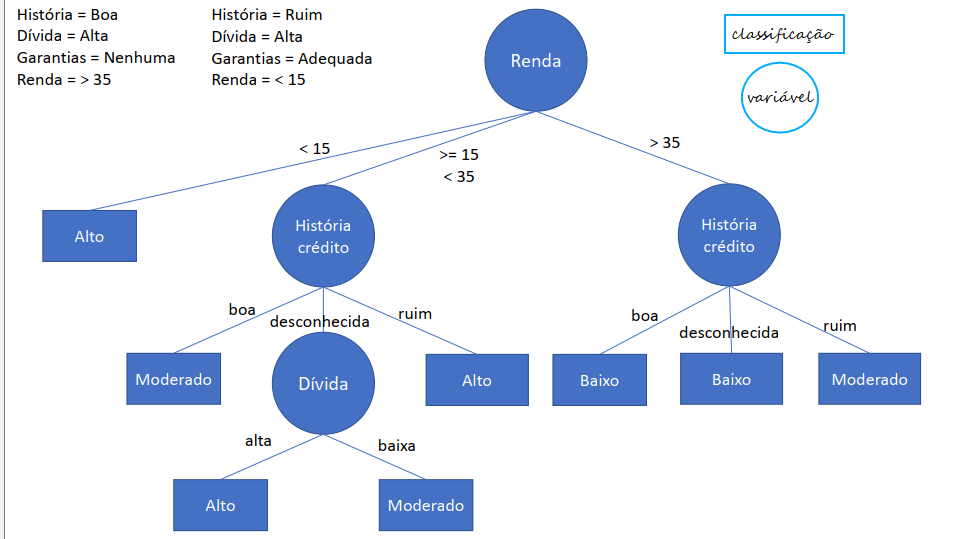

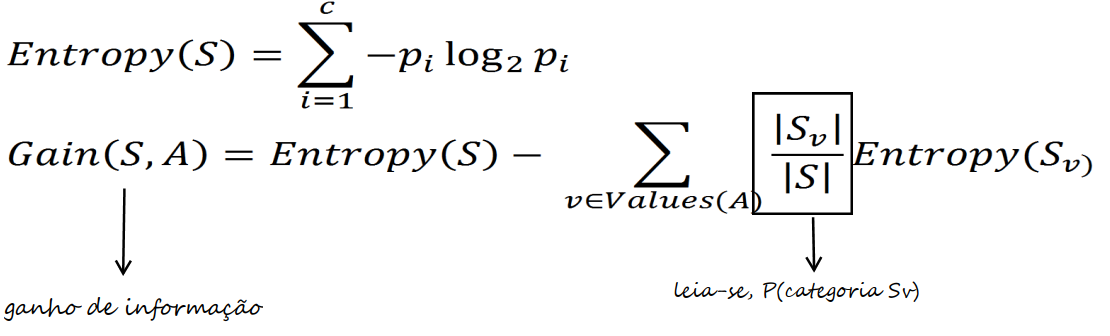

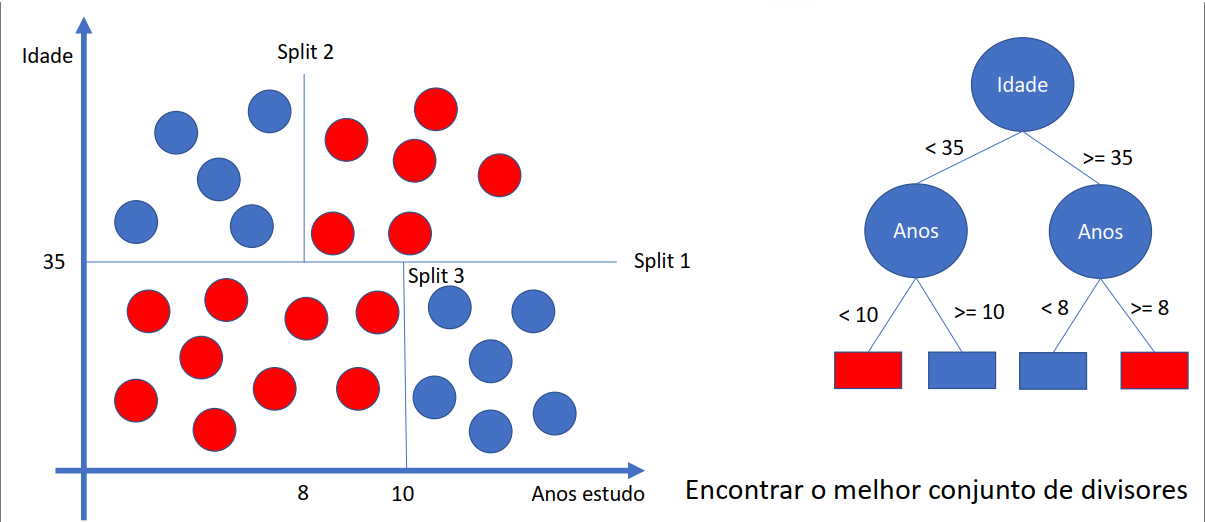

# 🔴 Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pickle
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

## 🔵 Base risco de crédito

### Importando dados

In [ ]:
with open('risco_credito.pkl', mode = 'rb') as f:
  X_risk_credit, Y_risk_credit = pickle.load(f)

In [ ]:
X_risk_credit
# Histórico de crédito, Dívidas, Garantias, Renda

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

Perceba que aqui você tem um vetor com 4 variáveis explicativas já com o LabelEnconder.

In [ ]:
# Variável de interesse
Y_risk_credit

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

### Criando o modelo

In [ ]:
# Cria o objeto
arvore_risk_credit = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
# Não separou dados de treino e teste
arvore_risk_credit.fit(X_risk_credit, Y_risk_credit)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Qual é o ganho de informação que cada variável gera?
arvore_risk_credit.feature_importances_

# Perceba que a última variável é a que estará no topo da árvore

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

In [ ]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

### Visualizando a árvore de decisão

In [ ]:
previsores = ['histórico','dívida','garantias','renda']

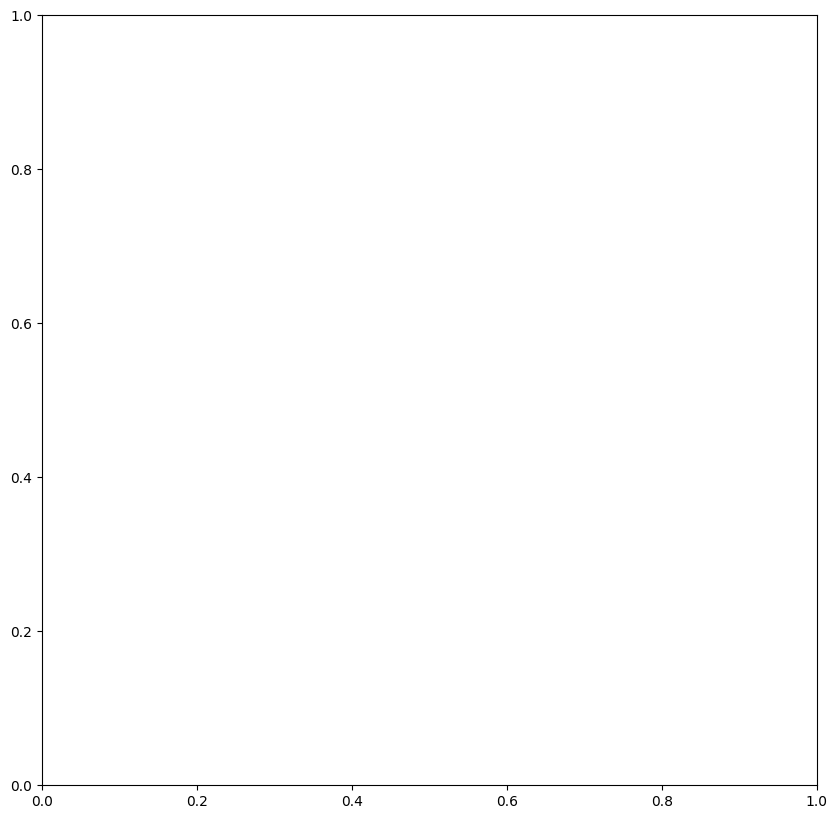

In [ ]:
#Criando o plano do gráfico
figure, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))

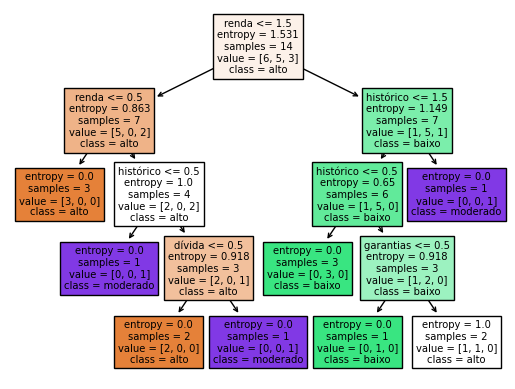

In [ ]:
tree.plot_tree(arvore_risk_credit, feature_names = previsores, class_names = arvore_risk_credit.classes_, filled = True);

😁Se o atributo for atendido, vai para a esquerda. Caso não seja, vai para a esquerda.
Por exemplo, no primeiro ponto, caso a renda seja 2, ele iria para a direita.

**Esses quadradinhos se chamam folhas**

### Testando
2 novas observações com as seguintes características:
1. história boa, dívida alta, garantias nenhuma, renda > 35
2. história ruim, dívida alta, garantias adequada, renda < 15

In [ ]:
previsoes = arvore_risk_credit.predict([[0,0,1,2],[2,0,0,0]])

In [ ]:
previsoes

array(['baixo', 'alto'], dtype=object)

## 🔵 Base credit data - 98.20%

### Importar os dados

In [ ]:
# Importar os dados com pickle
with open('credit.pkl', mode = 'rb') as f:
  X_credit_treino, X_credit_teste, Y_credit_treino, Y_credit_teste = pickle.load(f)

In [ ]:
# Shape dos dados de treino
X_credit_treino.shape, Y_credit_treino.shape

((1500, 3), (1500,))

In [ ]:
# Shape dos dados de teste
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

### Criando modelo

In [ ]:
# Criar o objeto
arvore_credit = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
# Fazer o fit do modelo
arvore_credit.fit(X_credit_treino, Y_credit_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predict com os dados de teste
teste_arvore_credit = arvore_credit.predict(X_credit_teste)

In [ ]:
teste_arvore_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Avaliando o modelo

In [ ]:
accuracy_score(Y_credit_teste, teste_arvore_credit)

0.982

0.982

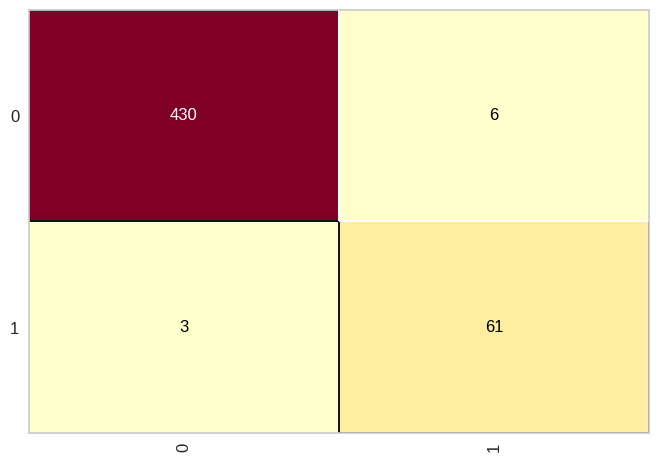

In [ ]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treino, Y_credit_treino)
cm.score(X_credit_teste, Y_credit_teste)

In [ ]:
print(classification_report(Y_credit_teste, teste_arvore_credit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



### Visualizando árvore de decisão

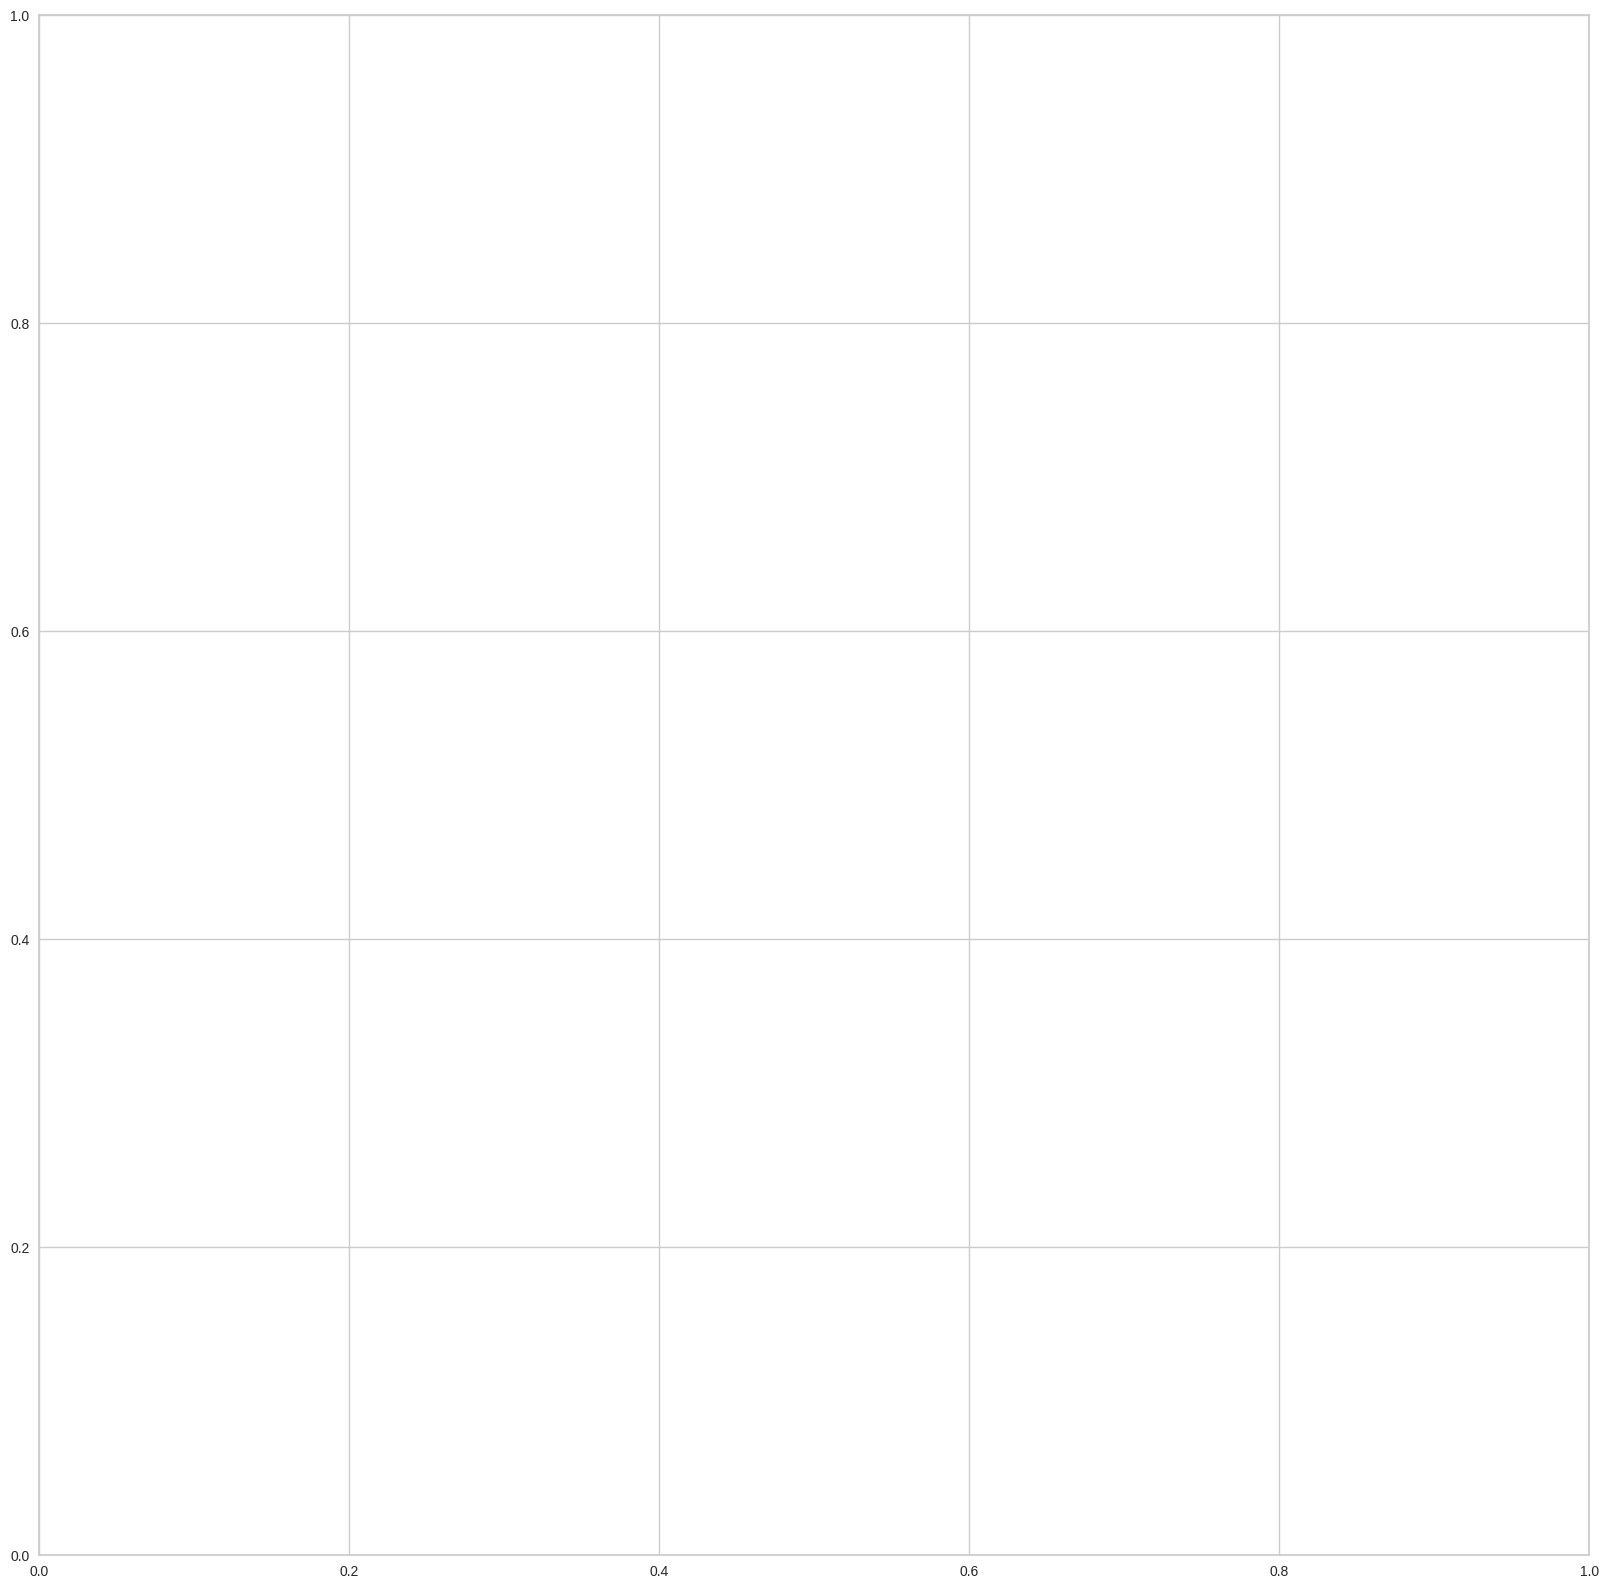

In [ ]:
previsores = ['income', 'age', 'loan']

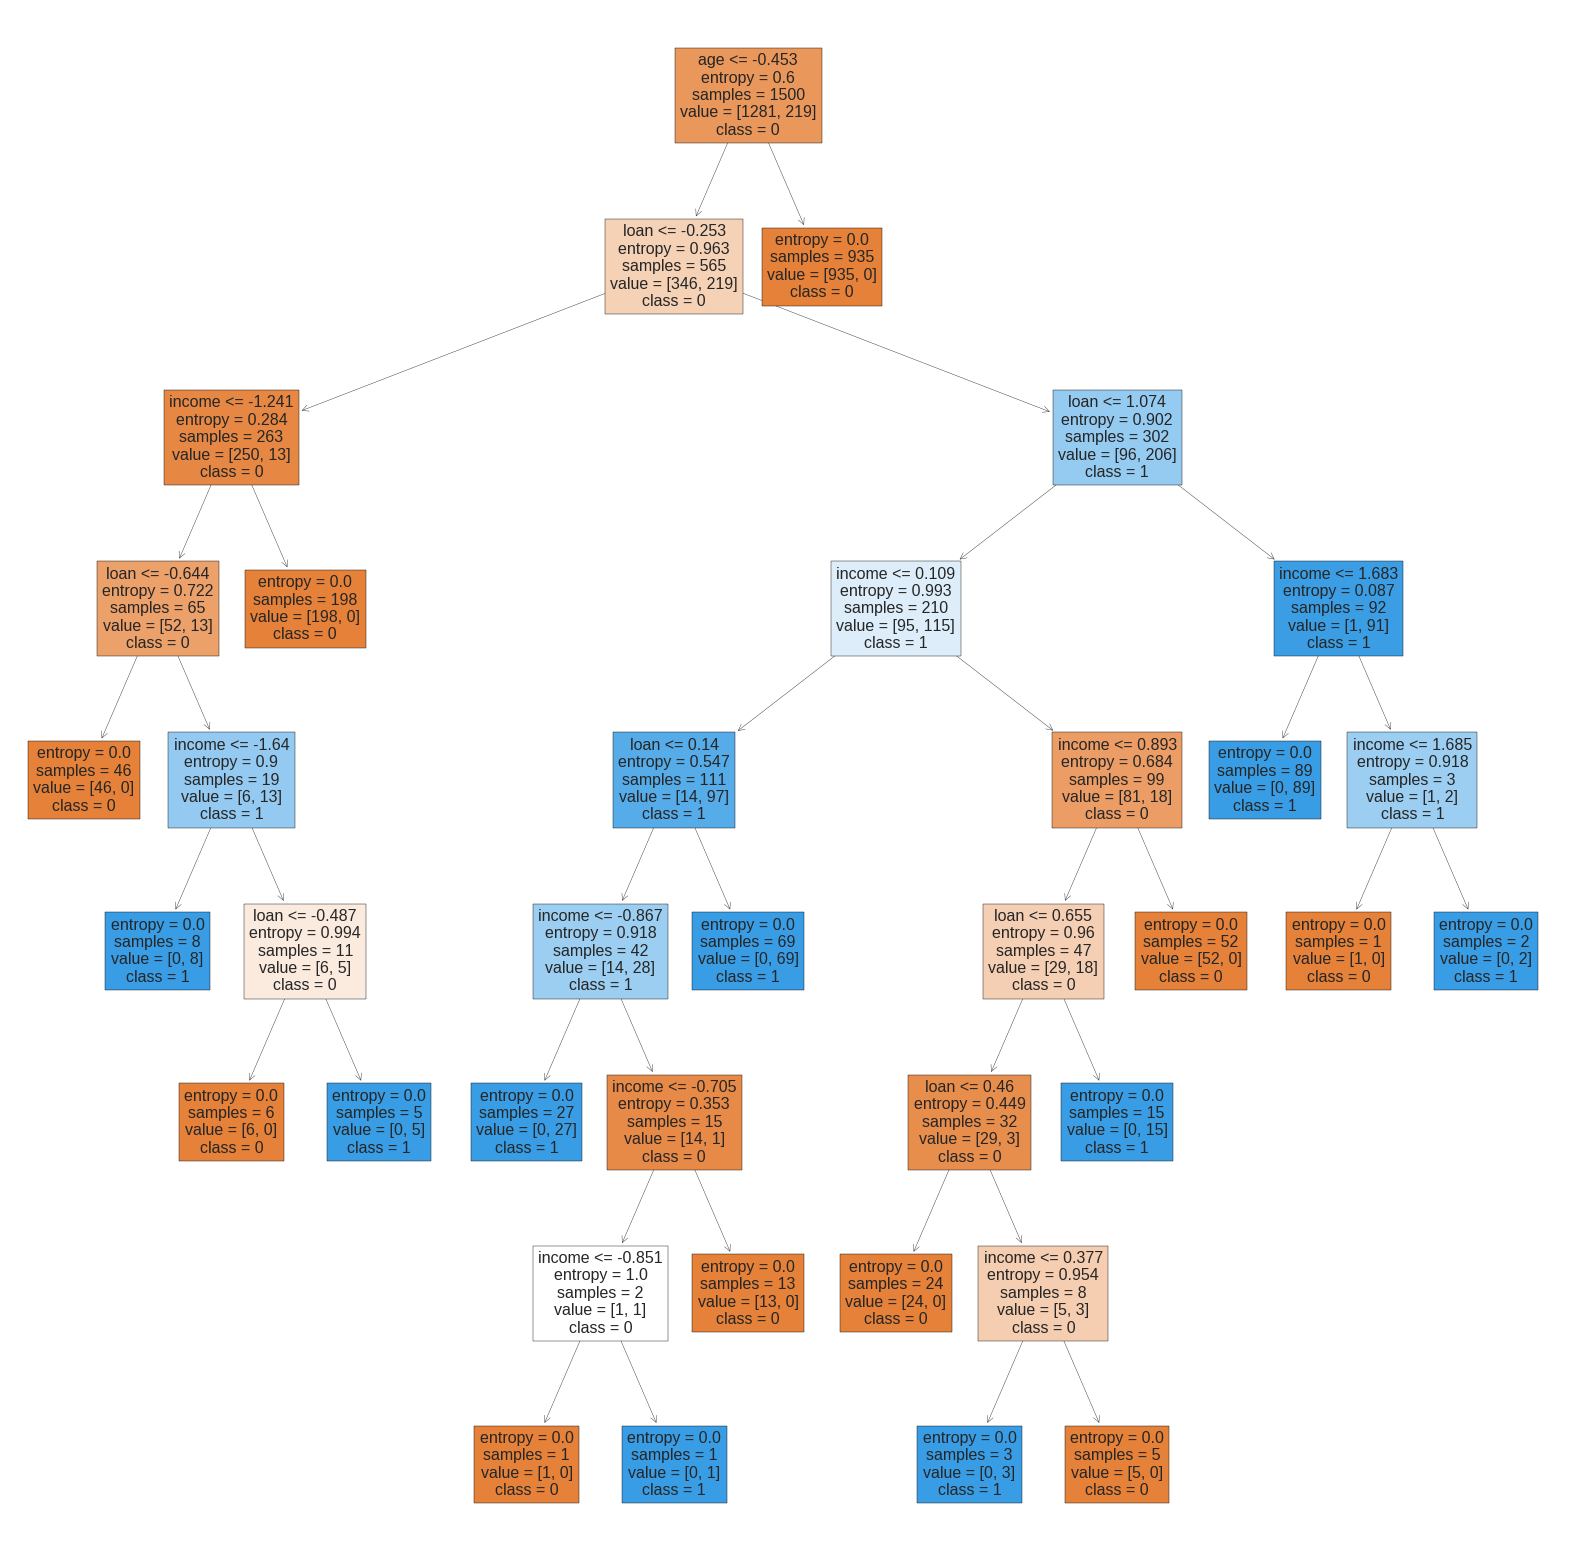

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names= previsores, class_names= ['0','1'] , filled=True);

In [ ]:
fig.savefig('arvore_credit.png')

## 🔵 Base census - 81.04%

### Importando dados

In [ ]:
# Carregar dados
with open('census.pkl', mode = 'rb') as f:
  X_census_treino, X_census_teste, Y_census_treino, Y_census_teste = pickle.load(f)

In [ ]:
# Shape treino
X_census_treino.shape, Y_census_treino.shape

((27676, 108), (27676,))

In [ ]:
# Shape teste
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

### Criar o modelo

In [ ]:
# Criar o objeto e dar o fit
arvore_census = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_census.fit(X_census_treino, Y_census_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Criar o predict com teste
teste_arvore_census = arvore_census.predict(X_census_teste)

In [ ]:
arvore_census.classes_

array([' <=50K', ' >50K'], dtype=object)

### Avaliando o modelo

In [ ]:
accuracy_score(Y_census_teste, teste_arvore_census) # respostas reais, respostas do modelo

0.8104401228249745

0.8104401228249745

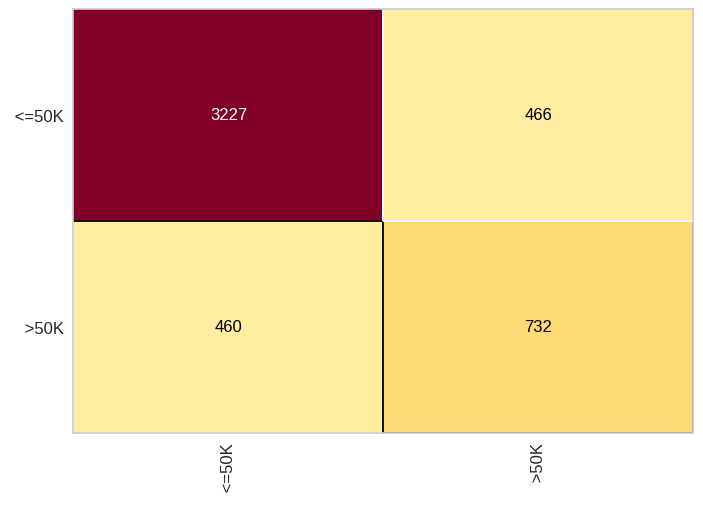

In [ ]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treino, Y_census_treino)
cm.score(X_census_teste, Y_census_teste)

In [ ]:
print(classification_report(Y_census_teste, teste_arvore_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



#  🔵 **Parte 4.2 - Florestas Randomicas** 🔵

#### Trabalhar com diversas árvores ao mesmo tempo. Cada árvore escolhe K atributos diferentes. São randomicas pois escolhem os atributos previsores de forma aleatória.

Esse número K pode ser o log(do número de var.exp) ou a raiz.

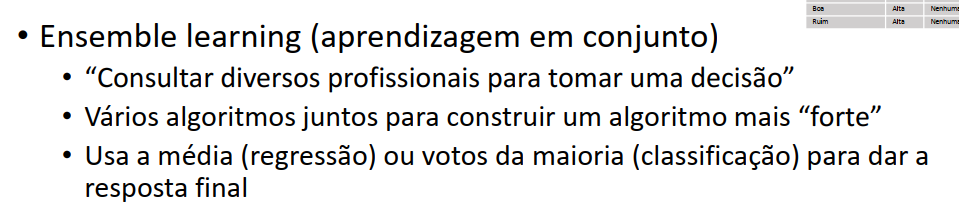

# 🔴 Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
#Ensemble é tipo concatenar, unir

## 🔵 Base credit data - 98.40%

In [37]:
# Criando o objeto
random_florest_credit = RandomForestClassifier(n_estimators = 40,
                                               criterion = 'entropy')

# n_estimators = número de árvores que serão geradas

In [38]:
# Criando o modelo
random_florest_credit.fit(X_credit_treino, Y_credit_treino)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [40]:
# Fazendo previsões
teste_random_florest_credit = random_florest_credit.predict(X_credit_teste)

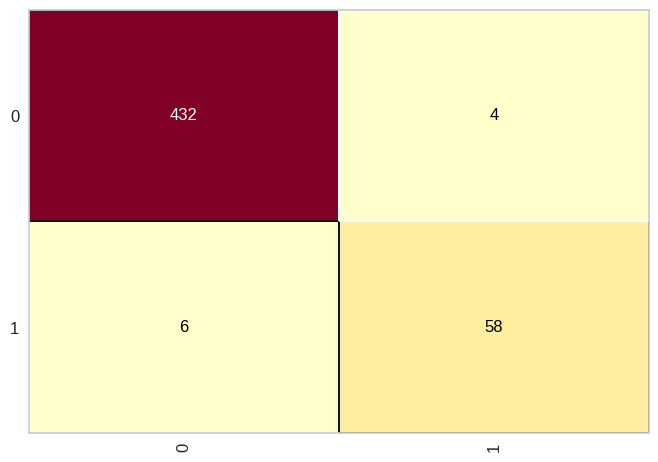

In [44]:
# Avaliando o modelo 1
cm = ConfusionMatrix(random_florest_credit)
cm.fit(X_credit_treino, Y_credit_treino)
cm.score(X_credit_teste, Y_credit_teste);

In [43]:
# Avaliando o modelo 2
accuracy_score(Y_credit_teste, teste_random_florest_credit)

0.98

In [45]:
print(classification_report(Y_credit_teste, teste_random_florest_credit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.91      0.92        64

    accuracy                           0.98       500
   macro avg       0.96      0.95      0.95       500
weighted avg       0.98      0.98      0.98       500



## 🔵 Base census - 85.07%

In [46]:
# Criando objeto
random_forest_census = RandomForestClassifier(n_estimators = 100,
                                              criterion = 'entropy',
                                              random_state = 0)

In [47]:
# Gerando fit
random_forest_census.fit(X_census_treino, Y_census_treino)

RandomForestClassifier(criterion='entropy', random_state=0)

In [48]:
# Realizando projeções
teste_random_forest_census = random_forest_census.predict(X_census_teste)

In [51]:
# Avaliando modelo 1 (acúracia)
accuracy_score(Y_census_teste, teste_random_forest_census)

0.8507676560900717

0.8507676560900717

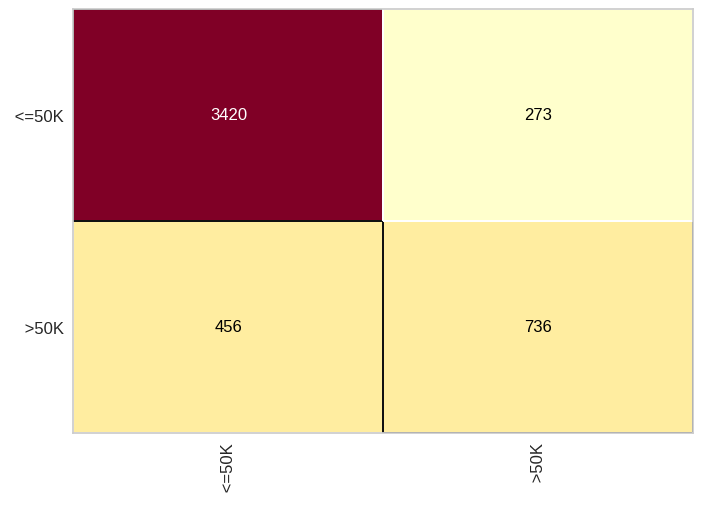

In [52]:
# Avaliando modelo 2
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treino, Y_census_treino)
cm.score(X_census_teste, Y_census_teste)

In [53]:
print(classification_report(Y_census_teste, teste_random_forest_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

